# RegionGrowing<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

In [ ]:
!wget https://www.dropbox.com/s/2zm4kx9ypo7zfbb/estuche.png?dl=0

--2021-11-10 21:47:05--  https://www.dropbox.com/s/prgf2itqgv8ns3p/estuche.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/prgf2itqgv8ns3p/estuche.png [following]
--2021-11-10 21:47:06--  https://www.dropbox.com/s/raw/prgf2itqgv8ns3p/estuche.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8e9149e14a61498bc3285fa60a.dl.dropboxusercontent.com/cd/0/inline/BZumBpnG6AGisLvyMxpRm2GHBDkTxmOp9qIMQd3IlD58ScHMmBRPVpILuBsJZflpOq1TTB--jh3JNnoOrBkxPxBjHxW8fKoUrpaG0IO467A3fowQiwOajBa_X7TyTBi_tb9XEvDrrk7apL3zb8pzkqVk/file# [following]
--2021-11-10 21:47:06--  https://uc8e9149e14a61498bc3285fa60a.dl.dropboxusercontent.com/cd/0/inline/BZumBpnG6AGisLvyMxpRm2GHBDkTxmOp9qIMQd3IlD58ScHMmBRPVpILuBsJZflpOq1TTB--jh3JNnoOrBkxPxBjHxW8f

In [1]:
import matplotlib.pylab as plt
import cv2
import numpy as np


In [2]:
from skimage.morphology import binary_dilation
from skimage.segmentation import clear_border


from skimage.color import label2rgb
from skimage.measure import label

def binview(img, mask, color='r', dilate_pixels=1):
    """
    Displays a gray or color image 'img' overlaid by color pixels determined a by binary image 'mask'. It is useful to
    display the edges of an image.

    Args:
        img: gray scale image (X-ray)
        mask: binary image that works as mask
        color: string to define pixel color.
                'r': red (default)
                'g': green
                'b': blue
                'y': yellow
                'c': cyan
                'm': magenta
                'k': black
                'w': white

        dilate_pixels (int): Number of pixels used for dilate the mask.

    Returns:
        img_color (ndarray): output image with a mask overlaid.
    """

    # Defines colors
    # colors = {
    #     'r': np.array([255, 0, 0]),
    #     'g': np.array([0, 255, 0]),
    #     'b': np.array([0, 0, 255]),
    #     'y': np.array([255, 255, 0]),
    #     'c': np.array([0, 255, 255]),
    #     'm': np.array([255, 0, 255]),
    #     'k': np.array([0, 0, 0]),
    #     'w': np.array([255, 255, 255])
    # }
    #
    colors = {
        'r': np.array([1, 0, 0]),
        'g': np.array([0, 1, 0]),
        'b': np.array([0, 0, 1]),
        'y': np.array([1, 1, 0]),
        'c': np.array([0, 1, 1]),
        'm': np.array([1, 0, 1]),
        'k': np.array([0, 0, 0]),
        'w': np.array([1, 1, 1])
    }
    # Create a RGB image from grayscale image.
    img_color = np.dstack((img, img, img))

    # Ensure do not modify the original color image and the mask
    img_color = img_color.copy()

    mask_ = mask.copy()
    # mask_ = dilate(mask_, np.ones((g, g), np.uint8))
    mask_ = binary_dilation(mask_, np.ones((dilate_pixels, dilate_pixels)))

    # Now black-out the area of the mask
    # img_fg = bitwise_and(img, img, mask=mask_)

    # Defines the pixel color used for the mask in the figure.
    cc = colors[color]
    #
    # for i in range(3):
    #     img_color[:, :, i] = cc[i] * img_fg

    # remove artifacts connected to image border
    cleared = clear_border(mask_)
    if np.all(cleared):
        mask_ = cleared

    # label image regions
    label_image = label(mask_)
    img_color = label2rgb(label_image, image=img_color, colors=[cc], bg_label=0)

    return img_color  # add(img_color, img_color)


In [3]:
from skimage.morphology import flood
from skimage.morphology import binary_dilation


def region_growing(img, seed_point, tolerance=20):
    """
    Args:
        img (ndarray): image
        seed_point (tuple): define the seed point.
        tolerance: a float or int value to define the maximal difference of grayvalues in the region. According to the
                   documentation in scikit-image, if tolerance is provided, adjacent points with values within plus 
                   or minus tolerance from the seed point are filled (inclusive).

    Returns:
        mask (ndarray): output binary image
    """
    mask = flood(img, seed_point, tolerance=tolerance)
    mask = binary_dilation(mask, np.ones((3, 3)))

    return mask


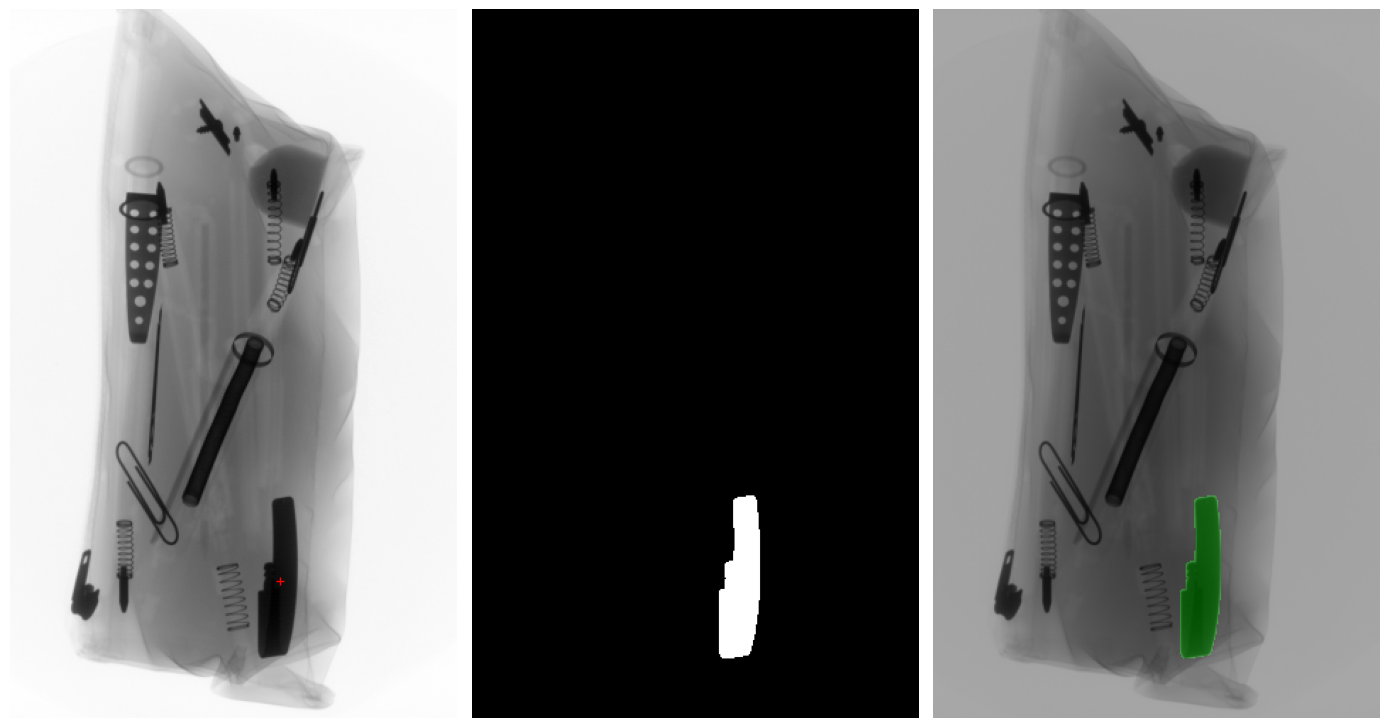

In [4]:

img = cv2.imread('estuche.png',0)
img = cv2.resize(img, None, fx=0.35, fy=0.35, interpolation=cv2.INTER_AREA)

th = 40  # threshold
si, sj = (403, 190)  # Seed

mask = region_growing(img, (si, sj), tolerance=th)

seg = binview(img, mask, 'g')

fig, ax = plt.subplots(1, 3, figsize=(14, 8))
ax[0].imshow(img, cmap='gray')
ax[0].plot(sj, si, 'r+')
ax[0].axis('off')
ax[1].imshow(mask, cmap='gray')
ax[1].axis('off')
ax[2].imshow(seg)
ax[2].axis('off')
plt.tight_layout()
plt.show()


**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).